In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
jjoo = pd.read_csv("data/athlete_events.csv")
jjoo

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [91]:
jjoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Identificación y tratamiento de valores nulos

In [92]:
jjoo.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [93]:
#Para tratar los nulos de los medallas, simplement asigno No Medal ("NoM") en lugar de NaN
jjoo["Medal"] = jjoo["Medal"].fillna("NoM")

In [94]:
#Para los nulos de edad, altura y peso, sustuiremos la mediana por sexo, ya que son variables secundarias.

jjoo["Height"] = jjoo.groupby(["Sex"])['Height'].transform(lambda x: x.fillna(x.median()))
jjoo["Age"] = jjoo.groupby(["Sex"])['Age'].transform(lambda x: x.fillna(x.median()))
jjoo["Weight"] = jjoo.groupby(["Sex"])['Weight'].transform(lambda x: x.fillna(x.median()))

In [95]:
jjoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Analizando y recodificando columnas

In [96]:
# Consultando las columnas observamos que para cada NOC (Comíté Olímpico Nacional) le corresponden diferentes equipos. 
# Vamos a analizarlos bien, para que así a cada atleta le coresponda simplemente el nombre de su país
jjoo.groupby("NOC")["Team"].nunique().sort_values(ascending=False)

NOC
FRA    160
USA     97
GBR     96
SWE     52
NOR     46
      ... 
VNM      1
YEM      1
YAR      1
YMD      1
ZAM      1
Name: Team, Length: 230, dtype: int64

Efectivamente para cada NOC le corresponden diferentes equipos. Vamos a utilizar el otro dataset de la entrada principal, que relaciona NOCs con países.

In [97]:
noc = pd.read_csv('data/noc_regions.csv')
noc = noc.drop("notes", axis = 1)
noc = noc.rename(columns = {"region": "Country"})

In [98]:
noc

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra
...,...,...
225,YEM,Yemen
226,YMD,Yemen
227,YUG,Serbia
228,ZAM,Zambia


In [99]:
# Unimos los dos datasets a través de la columna NOC para que aparezca la columna Country en nuestro dataset principal
# El join es left porque queremos todos los países participantes, tengan NOC o no asociado

jjoo_merge = jjoo.merge(noc, 
                        left_on = "NOC", 
                        right_on = "NOC", 
                        how = "left")

In [100]:
#Por consenso colectivo, nos vamos a quedar con los eventos de verano
jjoo = jjoo_merge[jjoo_merge["Season"] == "Summer"]

In [101]:
#Comprobamos si hay NOC/Equipos que no tiene país asignado
jjoo_merge.loc[jjoo_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [102]:
#Les asignamos país manualmente

jjoo.loc[jjoo['NOC']=='SGP', "Country"] = "Singapore"
jjoo.loc[jjoo['NOC']=='ROT', "Country"] = "Refugee Olympic Athletes"
jjoo.loc[jjoo['NOC']=='UNK', "Country"] = "Unknown"
jjoo.loc[jjoo['NOC']=='TUV', "Country"] = "Tuvalu"



In [103]:
#Elimamos la columna de Team, para quedarnos con Country como referencia
jjoo = jjoo.drop(["Team"], axis = 1)

## Potencias mundiales

In [104]:
#Vamos a explorar qué países tienen más medallas.
#Para simplificarnos la vida, vamos a hacer una columna que indique si el atleta tiene o medalla o no, independientemente del metal

jjoo["Has_Medal"] = "0"
jjoo.loc[jjoo["Medal"] != "NoM", "Has_Medal"] = 1

In [105]:
# Haciendo una prueba de un deporte de equipo, podemos comprovar que las medallas estan asignadas por atletas. 
# Como en los medalleros se cuenta 1 medalla por deporte de equipo, primero tenemos que encontrar los deportes de equipo y asignarles solo una medalla.
jjoo.loc[(jjoo.Sport == "Handball") & (jjoo["Medal"] == "Gold") & (jjoo.Year == 2016) & (jjoo.Sex == "M")]

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Has_Medal
41295,21299,Mads Christiansen,M,30.0,197.0,93.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
90256,45732,Henrik Toft Hansen,M,29.0,200.0,105.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
90337,45782,Mikkel Hansen,M,28.0,196.0,98.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
90361,45793,Ren Toft Hansen,M,31.0,200.0,105.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
107590,54379,Henrik Mllgaard Jensen,M,31.0,197.0,102.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
126854,63955,Jannick Green Krejberg,M,27.0,195.0,95.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
131775,66315,Niklas Landin Jacobsen,M,27.0,201.0,102.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
132743,66820,Mads Mensah Larsen,M,24.0,188.0,106.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
164022,82327,Casper Ulrich Mortensen,M,26.0,190.0,88.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
171165,86018,Michael Damgaard Nielsen,M,26.0,192.0,92.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1


In [106]:
# Forzar a que Has_Medal sea numérico 
jjoo['Has_Medal'] = pd.to_numeric(jjoo['Has_Medal'], errors='coerce').astype(int)

# Identificar eventos de equipo: 
# Si la suma de medallistas por país en un evento es > 1, es equipo.
# Usamos transform para devolver el resultado al tamaño original del dataframe.
jjoo['Team_Event'] = jjoo.groupby(['Year', 'Country', 'Event','Medal'])['Has_Medal'].transform('sum') > 1

# Corregir los empates en deportes individuales (falsos positivos)
individual_ties = ["Athletics Men's Pole Vault",
                   "Gymnastics Men's Horizontal Bar",
                   "Gymnastics Men's Horse Vault",
                   "Gymnastics Men's Horizontal Bar",
                   "Gymnastics Men's Pommelled Horse",
                   "Gymnastics Women's Balance Beam",
                   "Swimming Women's 100 metres Freestyle",
                   "Swimming Men's 50 metres Freestyle"]

jjoo.loc[jjoo['Event'].isin(individual_ties), 'Team_Event'] = False

# Crear el Tally consolidado (una fila por medalla real)
medals_tally = jjoo[jjoo["Has_Medal"] == 1].groupby(["Year", "Country", "Sport", "Event", "Medal"]
).agg(
    Athletes_in_podium=("Has_Medal", "sum"), 
    Is_team=("Team_Event", "max")        # Detectará True si al menos uno era de equipo
).reset_index()

# Cada fila ahora representa una "Medalla Única" para el medallero nacional
medals_tally['Medal_count'] = 1

# 3. Sumamos el total por país
medals_total = medals_tally.groupby("Country")["Medal_count"].sum().sort_values(ascending=False)

# 4. Seleccionamos el Top 10
top_10_countries = medals_total.head(10)

In [107]:
top_10_countries

Country
USA          2544
Russia       1577
Germany      1389
UK            892
France        770
Italy         608
China         545
Australia     518
Sweden        513
Hungary       504
Name: Medal_count, dtype: int64

Finalmente tenemos la tabla de las 10 potencias olímpicas históricas. Aprovechamos que hemos diferenciado deportes de equipos y deportes individuales para ver cómo de distribuyen las medallas en estas 10 potencias.

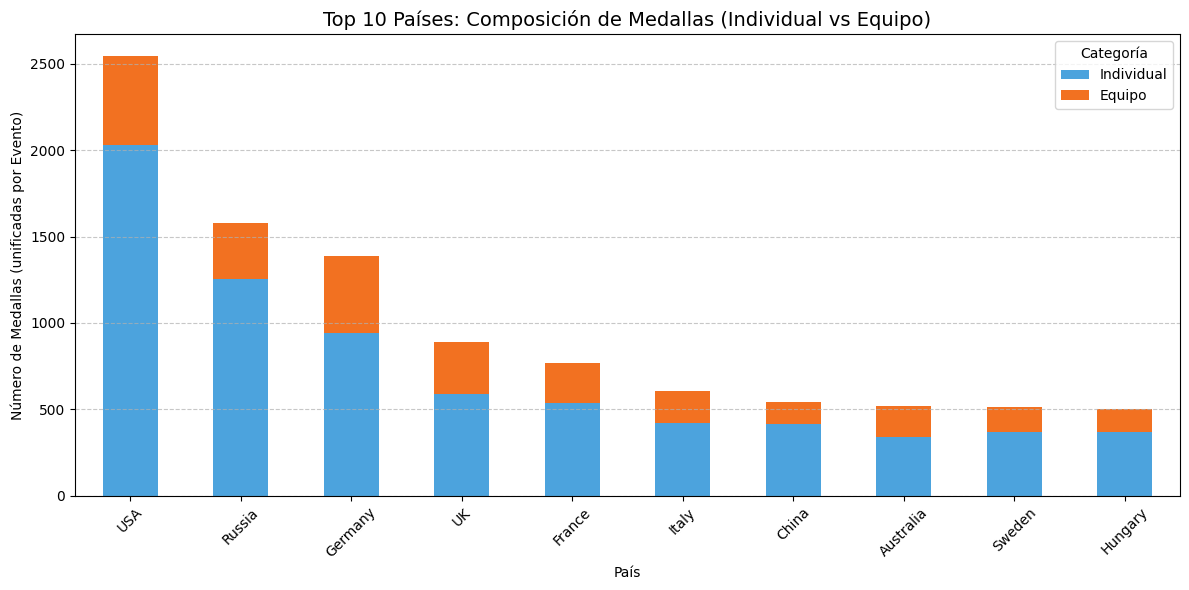

In [108]:
# Mapeamos False a 'Individual' y True a 'Equipo'
medals_tally['Kind_Event'] = medals_tally['Is_team'].map({False: 'Individual', True: 'Equipo'})

# Filtramos solo para los países del Top 10
df_plot = medals_tally[medals_tally['Country'].isin(top_10_countries.index)]

# El truco aquí es no renombrar columnas a mano, sino dejar que el mapeo lo haga solo
composition = pd.crosstab(df_plot['Country'], df_plot['Kind_Event'])

# Ordenar por el total de medallas original y reordenar columnas
composition = composition.loc[top_10_countries.index, ['Individual', 'Equipo']]

# Gráfico de barras apiladas
ax = composition.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#4ca3dd', '#f27121'])

plt.title('Top 10 Países: Composición de Medallas (Individual vs Equipo)', fontsize=14)
plt.ylabel('Número de Medallas (unificadas por Evento)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.legend(title='Categoría')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("img/Sergi/composicion_top10.png")
plt.show()

- Hay una hegemonía evidente de EEUU. No sólo lidera el ranking, sino que su número total de medallas es significativamente superior que el del segundo lugar (Rusia), superándolo por casi 1000 unidades. Esto sugiere una infraestructura deportiva masiva y diversificada a lo largo del tiempo.
- Aunque todos los países ganan más medallas individuales que de equipo, la proporción varía de manera interesante:
    - Países como EEUU, Rusia y China muestran una base sólida en deportes individuales.
    - Alemania destaca por tener una proporción de medalla de deportes de equipo muy significativa. Esto indica que es una potencia histórica en deportes colectivos (fútbol, hockey, balonmano...) en comparación con otros países europeos.
- Aparecen potencias históricas tradicionales como Frfancia, Italia o Reino Unido. Destacan países pequeños como Suecia y Hungria, con poblaciones muy menores a las grandees potencias y centrada en disciplinas específicas donde históricamente han sido fuertes (como la esgrima o el waterpolo en el caso de Hungría).
- Los últimos 4 países presentan mucha igualdad, lo que indica una competencia muy feroz, seguramente más amplia con otros países del Top 20.


## Evolución temporal potencias medallero

In [109]:
# Genero una lista con las 10 primeras potencias
list_top_10 = top_10_countries.index.tolist()

#Unstack nos permite separar los países por columnas y asignarles las medallas por año
year_country = medals_tally.groupby(["Year","Country"])["Medal_count"].sum().unstack(fill_value=0)

#Filtro las 10 primeras potencias
year_country = year_country.loc[:, list_top_10]


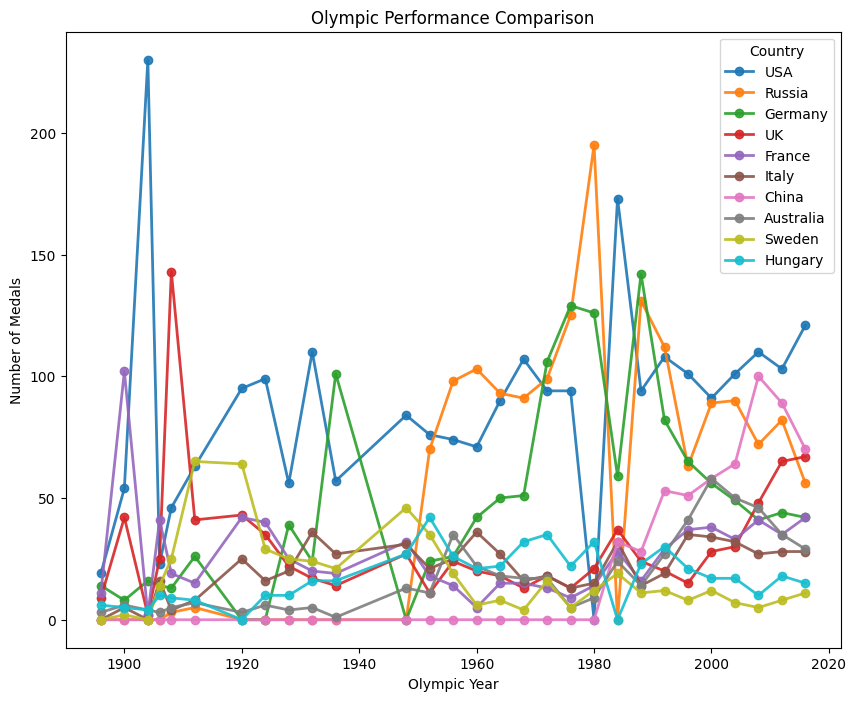

In [110]:
year_country.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)
plt.xlabel('Olympic Year')
plt.ylabel('Number of Medals')
plt.title('Olympic Performance Comparison')

plt.savefig("img/historico_10.png");

Para analizar la evolución temporal nos vamos a centrar sólo en 4 países: EEUU, Rusia, Alemania y China. Los 3 primeros no sólo pertenecen al Top 3, sino que presentan variaciones históricas interesantes. En cuanto a China, es una potencia emergente moderna y una de las potencias del siglo XXI. Los otros países presentan una variación bastante parecida y constante.

In [111]:
# Repetimos pero solo seleccionamos los país que nos interesan
top_countries = ["USA","Russia","Germany","China"]

#Filtramos sólo los Top 4 países
year_country4 = year_country.loc[:, top_countries]

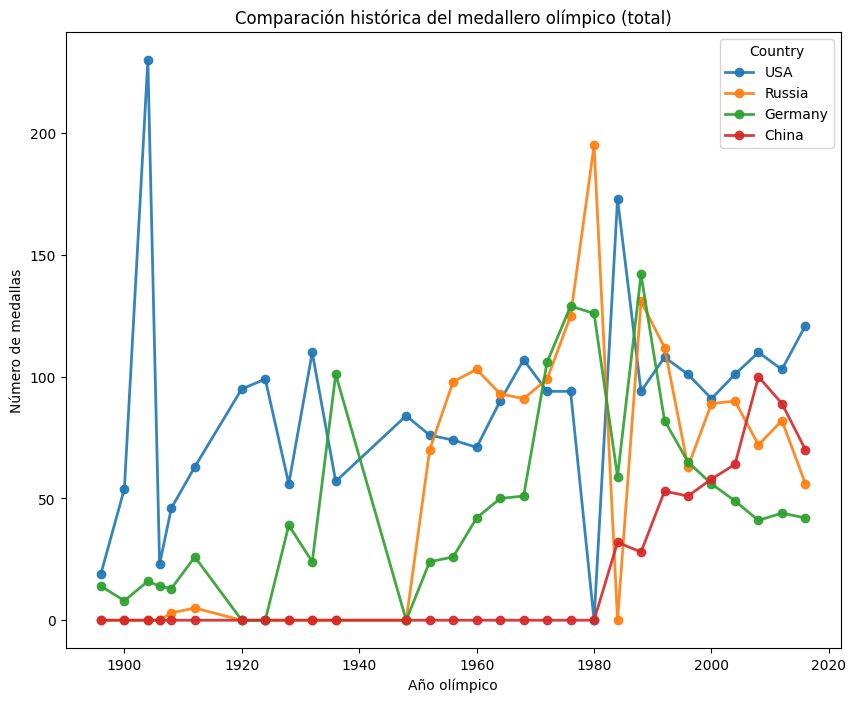

In [112]:
year_country4.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)
plt.xlabel('Año olímpico')
plt.ylabel('Número de medallas')
plt.title('Comparación histórica del medallero olímpico (total)')

plt.savefig("img/historico_4.png");

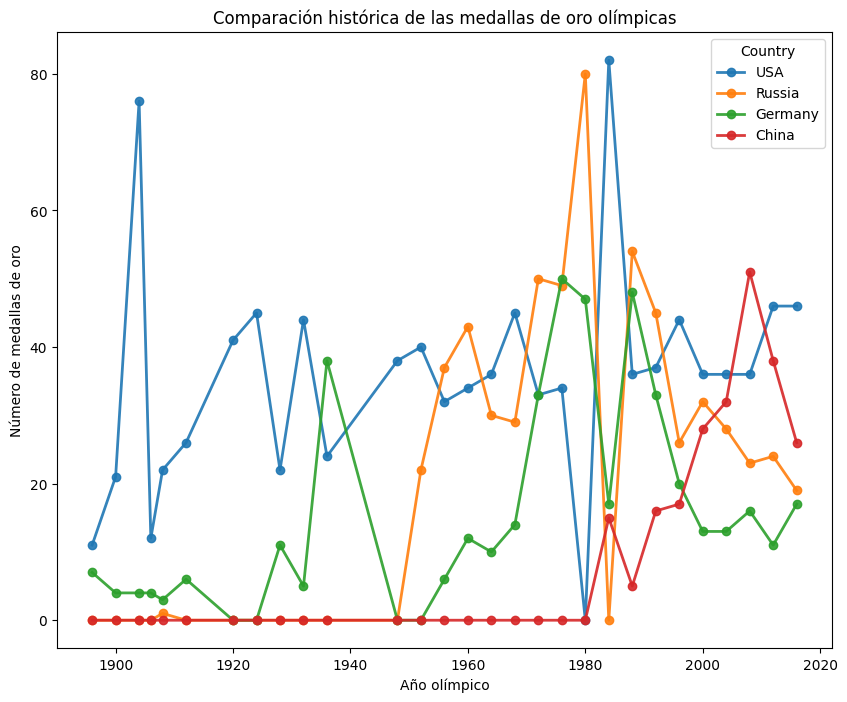

In [113]:
#La mayoría de tablas de medallas se ordenan por oros, así que repetimos el proceso para obtener la gráfica de oros.

gold_medals_total = medals_tally[medals_tally["Medal"] == "Gold"]
gold_medals_country = gold_medals_total.groupby(["Country"])["Medal_count"].sum()
year_country4_gold = gold_medals_total.groupby(["Year","Country"])["Medal_count"].sum().unstack(fill_value=0)
year_country4_gold = year_country4_gold.loc[:, top_countries]

year_country4_gold.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)
plt.xlabel('Año olímpico')
plt.ylabel('Número de medallas de oro')
plt.title('Comparación histórica de las medallas de oro olímpicas')

plt.savefig("img/oro_4.png");

Sólo con las tendencias individuales ya encontramos cosas interesantes que se deben analizar con detenimiento:
    - **EEUU**: un pico altísimo a principios del siglo XX, una tendencia bastante constante durante el siglo XX, 0 medallas en 1980 y el màximo histórico de medalla la edición siguiente. Des de entonces ha estado batallando por el primer lugar.
    - **Rusia**: aperece desde mediados de siglo y asciende meteóricamente hasta 1980 (cuando EEUU es baja). En 1984 seguramente no participó y des de entonces ha batallado con tropiezos como el bloque deportivo por dopaje, pero sigue en el Top. Aquí se ha simplificado, ya que Rusia participó cómo parte de la URSS a lo largo de muchas ediciones.
    - **Alemania**: tiene un gran pico en los años 30 (entre Guerras Mundiales) y una subida significativa en los años 60, un gran descenso en 1984 y un descenso paulatino desde entonces.
    - **China**: empieza a ganar medallas desde 1984 y sube drásticamente culminándolo en los juegos de Pequín en 2008.

Es necesario analizar las potencias individualmente pero también en relación a otras potencias. Además hay que hacer un recorrido históricas teniéndo en cuenta las siguientes etapas:
    - Pre IGM
    - IGM
    - Entre guerras
    - IIGM
    - Guerra Fría
    - Final siglo XX
    - Siglo XXI

Hay que analizar la relación entre Rusia y la URSS y la batalla Rusia - EEUU durante la Guerra Fría.

## Proporción metales potencias

Vamos a comprobar si la proporción de metales es coherente com el ranking y si hay un ranking también de oros.

In [114]:
# Filtramos los 4 países escogidos
medals_tally_top = medals_tally[medals_tally["Country"].isin(top_countries)]

# Unstack ahora nos permite separar las medallas por columnas y asignarlas al total de cada país
medals_by_country = medals_tally_top.groupby(["Country","Medal"])["Medal_count"].sum().unstack(fill_value=0)

# Ordenamos los metales
medals_by_country = medals_by_country.loc[:, ['Gold', 'Silver', 'Bronze']]

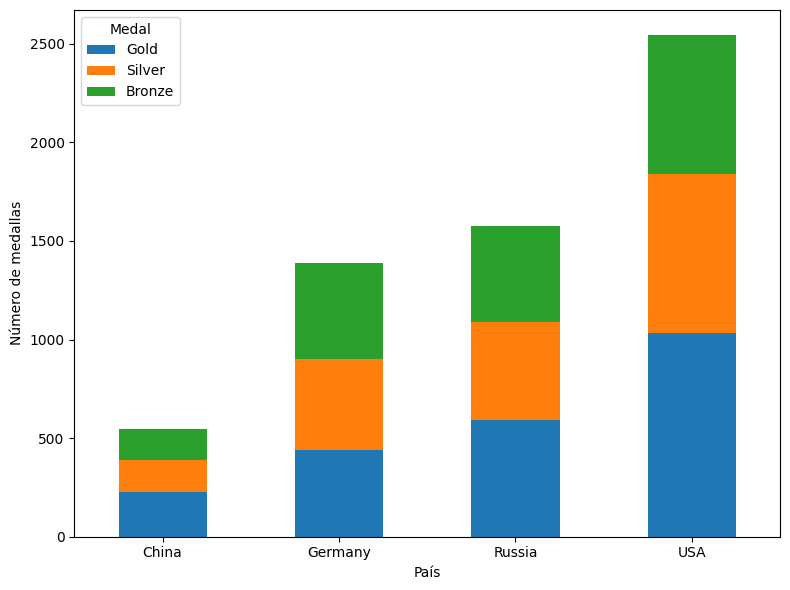

In [115]:
ax = medals_by_country.plot(kind = 'bar', stacked = True, figsize = (8,6), rot = 0)
plt.xlabel('País')
plt.ylabel('Número de medallas')

plt.tight_layout()
plt.savefig("img/proporcion_4.png")
plt.show()

Ningún país depende exclusivamente de un solo tipo de medalla; todos muestran una distribución relativamente balanceada entre oro, plata y bronce.

## Deportes más laureados

Para intentar desentrañar un poco el éxito de estas potencias, vamos a buscar cuáles son les deportes que les dan más medallas.

In [116]:
best_sports_gold = medals_tally_top.groupby(["Country","Sport","Medal"])["Medal_count"].sum().unstack(fill_value=0).reset_index()
best_sports_gold = best_sports_gold.drop(["Bronze","Silver"], axis = 1)
best_sports_gold = best_sports_gold.sort_values(by=["Country","Gold"], ascending = [True,False])
best_sports_gold = best_sports_gold.groupby("Country").head(5)
best_sports_gold

Medal,Country,Sport,Gold
8,China,Diving,40
29,China,Weightlifting,34
24,China,Table Tennis,28
12,China,Gymnastics,26
20,China,Shooting,22
34,Germany,Athletics,72
50,Germany,Rowing,64
54,Germany,Swimming,55
37,Germany,Canoeing,52
40,Germany,Equestrianism,41


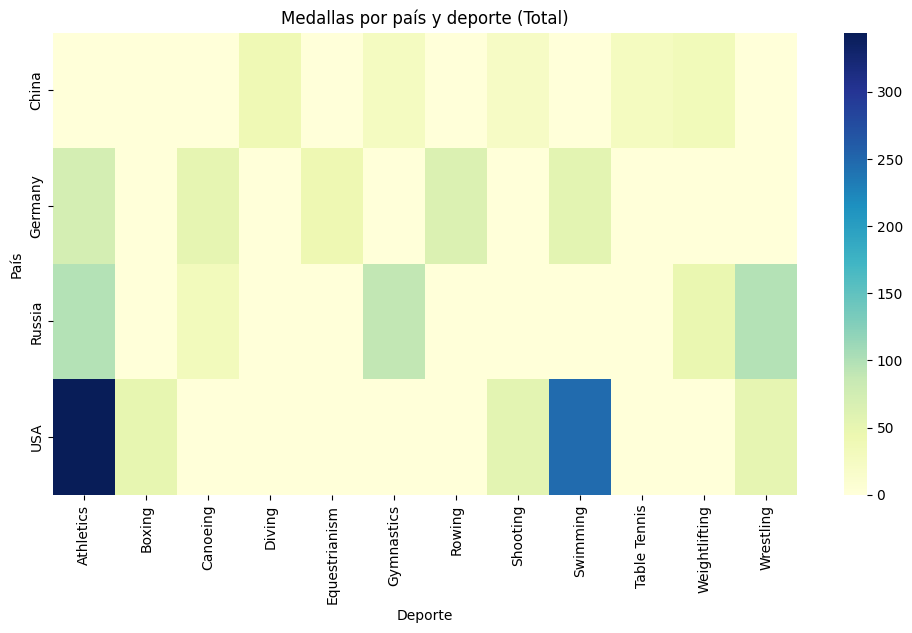

In [117]:
heatmap_data = best_sports_gold.pivot(index="Country", columns="Sport", values="Gold").fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, fmt=".0f", cmap="YlGnBu")
plt.title("Medallas por país y deporte (Total)")
plt.xlabel("Deporte")
plt.ylabel("País")
plt.show()

Unas claves del éxito es la especialización en deportes diferentes, ya que cada país tiene deportes estratégicos donde se concentra sus recursos y logra la mayoría de sus medallas. China y Rusia muestran concentración en unos pocos deportes. Alemania y Rusia están más distribuidos, aunque USA tiene concentración extrema en atletismo y natación. Cada país parece enfocarse en deportes donde históricamente ha invertido recursos y programas de entrenamiento especializados. Algunos deportes aparecen como “vacíos” para ciertos países, lo que indica falta de inversión o tradición. Se puede usar para planificar inversiones futuras, analizar competencias internacionales o estudiar cómo la especialización y la cultura deportiva influyen en los resultados olímpicos.


Estados Unidos destaca por los deportes técnicos individuales de alto rendimiento, como atletismo y natación. Sobresale en deportes que requieren velocidad, resistencia y entrenamiento sistemático.
Russia tiene una gran especialización en 3 deportes, como atletismo, gimnástica y lucha libre. Fuerte en deportes que combinan fuerza y técnica; gran parte en gimnasia y deportes de combate.
Alemania también puntúa en atletismo y natación, pero destaca en deportes de forma aislada como en equitación y remo. Tiene un buen balance entre deportes de resistencia y fuerza, y tiene una buena tradición en deportes de equipo y acuáticos.
Por último, China se centra en deportes de precisión y fuerza, dominando en deportes que tradicionalmente se asocian con su programa olímpico moderno. Destaca en deportes de forma única, cómo en salto de trampolín y ping-pong.



## Análisis con PIB y población

In [118]:
GDP = pd.read_csv("data/world_gdp.csv", skiprows=3)
pop = pd.read_csv("data/world_pop.csv")

In [119]:
# Quitamos las columnas que no nos interesan
GDP = GDP.drop(["Indicator Name","Indicator Code"], axis = 1)

# Con las años por columnas es difícil procesar datos. idvars fija columnas, var_name colapsa columnas en una, los valores numéricos en las celda se mueven a una nueva columna
GDP = pd.melt(GDP, id_vars = ["Country Name","Country Code"], var_name = "Year", value_name = "GDP")

# Nos aseguramos que los años sean tipo numérico
GDP.Year = pd.to_numeric(GDP["Year"])



Com queremos añadir los datos de PIB y de población en el dataset principal, vamos a comprovar cúal es la clave más común.

In [120]:
# Comprovamos cuántos códigos de países (NOC) existen en el dataset de los Juegos Olímpicos que NO aparecen en el dataset de GDP

print(f"No coinciden {len(list(set(jjoo['NOC'].unique()) - set(GDP['Country Code'].unique())))} códigos de países")

# Comprovamos cuántos países existen en el dataset de los Juegos Olímpicos que NO aparecen en el dataset de GDP

print(f"No coinciden {len(list(set(jjoo['Country'].unique()) - set(GDP['Country Name'].unique())))} nombres de países")

No coinciden 108 códigos de países
No coinciden 6 nombres de países


Como sólo hay 6 países que no coinciden, lo utilizaremos como clave común para fusionar los dos datasets.

In [121]:
# Fusionamos para tener los códigos de países

olympics_merge = jjoo.merge(GDP[['Country Name', 'Country Code']].drop_duplicates(),
                                            left_on = 'Country',
                                            right_on = 'Country Name',
                                            how = 'left')

# Quitamos la columna duplicada

olympics_merge.drop('Country Name', axis = 1, inplace = True)

# Fusionameos para obtener el PIB

olympics_merge_gdp = olympics_merge.merge(GDP,
                                                left_on = ['Country Code', 'Year'],
                                                right_on = ['Country Code', 'Year'],
                                                how = 'left')

olympics_merge_gdp.drop('Country Name', axis = 1, inplace = True)

In [122]:
olympics_merge_gdp

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Has_Medal,Team_Event,Country Code,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoM,China,0,False,CHN,4.269160e+11
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoM,China,0,False,CHN,8.560550e+12
2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoM,Denmark,0,False,DNK,NaN
3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,True,DNK,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,59.0,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NoM,Netherlands,0,False,NLD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NoM,Argentina,0,False,ARG,1.646580e+11
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NoM,USA,0,False,USA,1.282450e+12
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NoM,Russia,0,False,RUS,2.597080e+11
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NoM,Russia,0,False,RUS,5.910170e+11


In [123]:
# Repetimos el proceso para el dataset de Población, que tiene las mismas características

pop.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)
pop = pd.melt(pop, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')
pop['Year'] = pd.to_numeric(pop['Year'])
pop.head()

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [124]:
olympics_complete = olympics_merge_gdp.merge(pop,
                                            left_on = ['Country Code', 'Year'],
                                            right_on= ['Country Code', 'Year'],
                                            how = 'left')

olympics_complete.drop('Country_y', axis = 1, inplace = True)
olympics_complete = olympics_complete.rename(columns={'Country_x': 'Country'})
olympics_complete.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Has_Medal,Team_Event,Country Code,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoM,China,0,False,CHN,4.269160e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoM,China,0,False,CHN,8.560550e+12,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoM,Denmark,0,False,DNK,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,True,DNK,NaN,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,59.0,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NoM,Netherlands,0,False,NLD,NaN,NaN


In [125]:
olympics_complete.isnull().sum()

ID                  0
Name                0
Sex                 0
Age                 0
Height              0
Weight              0
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Country             0
Has_Medal           0
Team_Event          0
Country Code     1268
GDP             76832
Population      58871
dtype: int64

In [126]:
#Como sólo tenemos datos de PIB y población a partir de 1961, haremos análisis solamente de estos años.

olympics_complete_subset = olympics_complete.loc[(olympics_complete['Year'] > 1960)]
olympics_complete_subset = olympics_complete_subset.reset_index()
olympics_complete_subset.head()

,index,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,...,City,Sport,Event,Medal,Country,Has_Medal,Team_Event,Country Code,GDP,Population
0,0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,NoM,China,0,False,CHN,4.269160e+11,1.164970e+09
1,1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,NoM,China,0,False,CHN,8.560550e+12,1.350695e+09
2,7,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,...,Sydney,Badminton,Badminton Men's Singles,NoM,Finland,0,False,FIN,1.255400e+11,5.176209e+06
3,8,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,...,Atlanta,Sailing,Sailing Women's Windsurfer,NoM,Finland,0,False,FIN,1.320990e+11,5.124573e+06
4,9,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,...,Sydney,Sailing,Sailing Women's Windsurfer,NoM,Finland,0,False,FIN,1.255400e+11,5.176209e+06


In [127]:

medals_tally_1960 = olympics_complete_subset[olympics_complete_subset["Has_Medal"] == 1].groupby(["Year", "Country", "Sport","Event", "Medal"]).agg(atletas=("Has_Medal","sum")).reset_index()
medals_tally_1960['Medal_corrected'] = 1
medals_tally_1960

,Year,Country,Sport,Event,Medal,atletas,Medal_corrected
0,1964,Argentina,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",Silver,1,1
1,1964,Australia,Athletics,"Athletics Men's 10,000 metres",Bronze,1,1
2,1964,Australia,Athletics,Athletics Women's 200 metres,Bronze,1,1
3,1964,Australia,Athletics,Athletics Women's 400 metres,Bronze,1,1
4,1964,Australia,Athletics,Athletics Women's 400 metres,Gold,1,1
...,...,...,...,...,...,...,...
10688,2016,Venezuela,Athletics,Athletics Women's Triple Jump,Silver,1,1
10689,2016,Venezuela,Boxing,Boxing Men's Flyweight,Bronze,1,1
10690,2016,Venezuela,Cycling,Cycling Women's BMX,Bronze,1,1
10691,2016,Vietnam,Shooting,"Shooting Men's Air Pistol, 10 metres",Gold,1,1


In [128]:
# gold_1960 = medals_tally_1960[medals_tally_1960["Medal"] == "Gold"]
# gold_country_1960 = gold_1960.groupby(["Country"])["Medal_corrected"].sum()
# year_gold_1960 = gold_1960.groupby(["Year","Country"])["Medal_corrected"].sum().unstack(fill_value=0)
# year_gold_1960 = year_gold_1960.loc[:, top_countries]

# year_gold_1960.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)
# plt.xlabel('Olympic Year')
# plt.ylabel('Number of Gold Medals')
# plt.title('Olympic Gold Medal Comparison');

## Eficiencia deportiva (medallas / GDP por cápita)

Queremos evitar comparar con el PIB total ya que es engañoso. Un país muy poblado puede tener un PIB alto pero una renta por cápita baja. Pensamos que la inversión en deporte de élite está más relacionada con el PIB por cápita.
Por eso, vamos a analizar la eficiencia deportiva, o sea el coste por medalla. Para hacerlo vamos a calcular el nº de medalla/PIB por cápita. Además, para hacerlo de forma más precisa, vamos a puntuar de forma ponderada los diferentes metales, ya que un país con un oro es más "eficiente en términos de excelencia que uno con un bronce. O sea que el cálculo se convertirá en puntos totales/pib por cápita.

In [129]:
# Asignamos 1 puntos a cada medalla de bronce, 2 puntos a cada plata y 3 puntos a cada oro.

sistema_puntos = {
    'Gold': 3,
    'Silver': 2,
    'Bronze': 1
}

medals_tally_1960['points'] = medals_tally_1960['Medal'].map(sistema_puntos).fillna(0)
medals_tally_1960

,Year,Country,Sport,Event,Medal,atletas,Medal_corrected,points
0,1964,Argentina,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",Silver,1,1,2
1,1964,Australia,Athletics,"Athletics Men's 10,000 metres",Bronze,1,1,1
2,1964,Australia,Athletics,Athletics Women's 200 metres,Bronze,1,1,1
3,1964,Australia,Athletics,Athletics Women's 400 metres,Bronze,1,1,1
4,1964,Australia,Athletics,Athletics Women's 400 metres,Gold,1,1,3
...,...,...,...,...,...,...,...,...
10688,2016,Venezuela,Athletics,Athletics Women's Triple Jump,Silver,1,1,2
10689,2016,Venezuela,Boxing,Boxing Men's Flyweight,Bronze,1,1,1
10690,2016,Venezuela,Cycling,Cycling Women's BMX,Bronze,1,1,1
10691,2016,Vietnam,Shooting,"Shooting Men's Air Pistol, 10 metres",Gold,1,1,3


In [130]:
#Filtramos año, país, PIB y población

year_team_gdp = olympics_complete_subset.loc[:, ['Year', 'Country', 'GDP','Population',]].drop_duplicates()


In [131]:
# Fusionamos el dataset con los puntos con los datos de población y PIB
medal_tally_gdp = medals_tally_1960.merge(year_team_gdp,
                                   left_on = ['Year', 'Country'],
                                   right_on = ['Year', 'Country'],
                                   how = 'left')

In [132]:
# Calculamos el GPD por capita
medal_tally_gdp['GDP_Capita'] = medal_tally_gdp["GDP"]/medal_tally_gdp["Population"]

# Calculamos la eficiencia deportiva
medal_tally_gdp['Efficiency'] = medal_tally_gdp["Medal_corrected"]/medal_tally_gdp["Population"]

In [133]:
# Creamos los puntos por medalla
medal_tally_gdp['points_value'] = medal_tally_gdp['Medal'].map({'Gold': 3, 'Silver': 2, 'Bronze': 1}).fillna(0)

# Agrupamos para tener el éxito total por país y año
df_points = medal_tally_gdp.groupby(['Country', 'Year', 'GDP_Capita']).agg({
    'points_value': 'sum',
    'Medal': 'count' 
}).reset_index()

# Renombramos para claridad
df_points.rename(columns={'points_value': 'total_points', 'Medal': 'total_medals'}, inplace=True)

df_points['points_efficiency'] = df_points['total_points'] / (df_points['GDP_Capita'] / 10000)

In [134]:
df_points.sort_values(by='total_points', ascending = False)

,Country,Year,GDP_Capita,total_points,total_medals,points_efficiency
719,USA,1984,17134.273296,398,173,232.282976
260,Germany,1988,17863.418081,287,142,160.663541
257,Germany,1976,6609.754401,266,129,402.435528
258,Germany,1980,12092.377309,257,126,212.530583
727,USA,2016,57638.236457,250,121,43.373985
...,...,...,...,...,...,...
294,Iceland,1984,12057.172840,1,1,0.829382
326,Ireland,1964,965.135423,1,1,10.361240
21,Armenia,2000,622.742748,1,1,16.057995
1,Afghanistan,2012,669.009051,1,1,14.947481


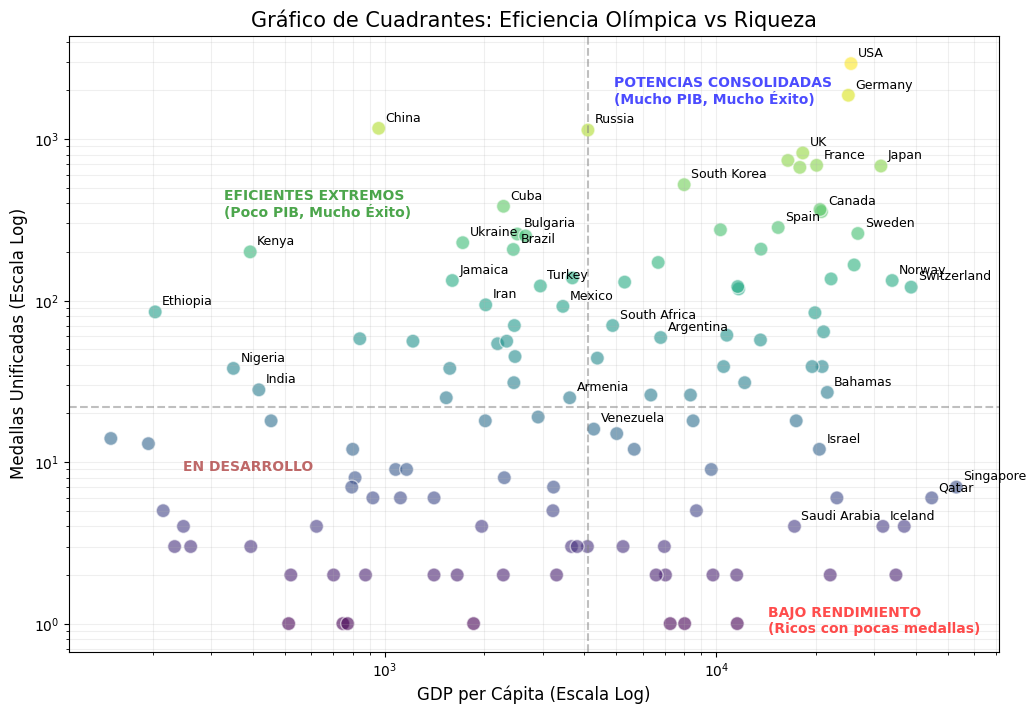

In [135]:
# Agrupamos por país para tener totales históricos o de un año concreto
df_quadrant = df_points.groupby('Country').agg({
    'total_points': 'sum',      # Medallas unificadas por evento
    'GDP_Capita': 'median'       # GDP mediano histórico
}).reset_index()

# Filtramos países con 0 medallas o sin GDP para evitar errores en logaritmo
df_quadrant = df_quadrant[(df_quadrant['total_points'] > 0) & (df_quadrant['GDP_Capita'] > 0)]

# Configurar el gráfico
plt.figure(figsize=(12, 8))
x = df_quadrant['GDP_Capita']
y = df_quadrant['total_points']

# Dibujar el Scatter Plot con escala logarítmica
plt.scatter(x, y, alpha=0.6, edgecolors='w', s=100, c=np.log10(y), cmap='viridis')

# Transformar ejes a escala logarítmica
plt.xscale('log')
plt.yscale('log')

# Definir las líneas del cuadrante (usamos la mediana para que sea más equilibrado)
mid_x = np.median(x)
mid_y = np.median(y)

plt.axvline(mid_x, color='gray', linestyle='--', alpha=0.5)
plt.axhline(mid_y, color='gray', linestyle='--', alpha=0.5)

# Añadir etiquetas a los países más representativos de cada cuadrante
labels = ["USA","Germany","China","UK","France","Japan","Qatar","South Korea","Norway","Switzerland","Venezuela","Armenia","Canada","Nigeria","India","Turkey","Sweden","South Africa","Argentina","Spain","Bahamas","Cuba","Russia","Cuba","Bulgaria","Brazil","Ukraine","Jamaica","Iran","Mexico","Kenya","Ethiopia","Israel","Saudi Arabia","Iceland","Singapore"] 

top_labels = df_quadrant[df_quadrant['Country'].isin(labels)]

# top_labels = df_quadrant[(df_quadrant['total_points'] > mid_y*2) | (df_quadrant['GDP_Capita'] > mid_x*2)]

for i, row in top_labels.iterrows():
    plt.annotate(row['Country'], (row['GDP_Capita'], row['total_points']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

# Anotaciones de los Cuadrantes
plt.text(mid_x * 0.08, mid_y * 15, "EFICIENTES EXTREMOS\n(Poco PIB, Mucho Éxito)", 
         color='green', fontweight='bold', alpha=0.7)
plt.text(mid_x * 1.2, mid_y * 75, "POTENCIAS CONSOLIDADAS\n(Mucho PIB, Mucho Éxito)", 
         color='blue', fontweight='bold', alpha=0.7)
plt.text(mid_x * 0.06, mid_y * 0.4, "EN DESARROLLO", 
         color='brown', fontweight='bold', alpha=0.7)
plt.text(mid_x * 3.5, mid_y * 0.04, "BAJO RENDIMIENTO\n(Ricos con pocas medallas)", 
         color='red', fontweight='bold', alpha=0.7)

plt.title('Gráfico de Cuadrantes: Eficiencia Olímpica vs Riqueza', fontsize=15)
plt.xlabel('GDP per Cápita (Escala Log)', fontsize=12)
plt.ylabel('Medallas Unificadas (Escala Log)', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.savefig("img/eficiencia.png");
plt.show()


En este gráfico podemos comparar muy visualmente el éxito deportivo histórico nfrente a la capacidad económica (PIB per cápita).
Por un lado vemos que a medida que nos movemos hacia la derecha (países más "ricos"), algunos puntos tienden a subir. Esto indica que el dinero ayuda a financiar la infraestructura deportiva, pero la cultura deportiva y las políticas de estado y sus prioridades son determinantes.

El gráfico se divide en 4 cuadrantes con perfiles bastante claros:
    - Potencias consolidadas: EEUU, Alemania o Francia tienen buena financiación y cultura del deporte. Son los dominadores históricos del medallero y la mayoría de las potencias del medallero estan aquí.
    - Eficientes extremos: es un grupo interesante con países com China, Kenia, Etiopía o Jamaica, que logran grandes resultados a pesar de tener un PIB por cápita relativamente bajo. China es el caso más extremo cómo ya hemos comentado anteriormente gracias a una inversión estatal dirigida. Destacan casos como los países africanos o Jamaica, muy especializados en ciertas disciplinas de atletismo.
    - Bajo rendimiento: són países con gran riqueza pero con pocas medallas, ya sea porque la inversión deportiva es reciente, no hay una base de deportistas de élite consolidada o no hay prioridad política y cultura deportiva de élite.
    - En desarrollo: países con recursos lmitados y poco éxitos olímpicos. Donde se encuentra la base de la mayoría de las naciones del mundo.

En el centro vertical del gráfico podemos identificar países con pasado o presente comunista (Cuba, Bielorússia, Russia o Ucrania), que refleja un legado de sistemas deportivos estatales robustos diseñados durante el siglo XX, donde el éxito olímpico era una prioridad de orgullo nacional.

China es un outlier y un ejemplo de como una gran población y una centralización de recursos puede llevar a un país a competir con las potencia con mas historia y riqueza.

## Home advantage


Parece que organizar un evento como los Juegos Olímpicos es una oportunidad para el país amfitrión para invertir, prepararse y buscar el éxito deportivo. Vamos a ver si es una tendencia general, sólo unos casos aislados o si lo es en gran medida o moderadamente.

In [136]:
# Filtramos nuestro dataset completo con las ciudades amfitrionas

olympics_complete[['Year', 'City']].drop_duplicates().sort_values('Year')

,Year,City
2676,1896,Athina
3,1900,Paris
629,1904,St. Louis
202,1906,Athina
979,1908,London
10,1912,Stockholm
2,1920,Antwerpen
14,1924,Paris
71,1928,Amsterdam
4,1932,Los Angeles


In [137]:
#Parece que hay un error, ya que aparecen 2 países amfitriones en 1956. Vamos a investigar.
olympics_complete.iloc[5458]

ID                                                         3479
Name                            Karl Vilhelm Nordstrm Ammitzbll
Sex                                                           M
Age                                                        40.0
Height                                                    179.0
Weight                                                     74.0
NOC                                                         DEN
Games                                               1956 Summer
Year                                                       1956
Season                                                   Summer
City                                                  Stockholm
Sport                                             Equestrianism
Event           Equestrianism Men's Three-Day Event, Individual
Medal                                                       NoM
Country                                                 Denmark
Has_Medal                               

In [138]:
olympics_complete.loc[(olympics_complete["Year"] == 1956) & (olympics_complete["Sport"] == "Equestrianism")]

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Has_Medal,Team_Event,Country Code,GDP,Population
5458,3479,Karl Vilhelm Nordstrm Ammitzbll,M,40.0,179.0,74.0,DEN,1956 Summer,1956,Summer,Stockholm,Equestrianism,"Equestrianism Men's Three-Day Event, Individual",NoM,Denmark,0,False,DNK,NaN,NaN
5459,3479,Karl Vilhelm Nordstrm Ammitzbll,M,40.0,179.0,74.0,DEN,1956 Summer,1956,Summer,Stockholm,Equestrianism,"Equestrianism Men's Three-Day Event, Team",NoM,Denmark,0,False,DNK,NaN,NaN
5854,3728,Hans Christian Andersen,M,42.0,179.0,74.0,DEN,1956 Summer,1956,Summer,Stockholm,Equestrianism,"Equestrianism Men's Three-Day Event, Individual",NoM,Denmark,0,False,DNK,NaN,NaN
5855,3728,Hans Christian Andersen,M,42.0,179.0,74.0,DEN,1956 Summer,1956,Summer,Stockholm,Equestrianism,"Equestrianism Men's Three-Day Event, Team",NoM,Denmark,0,False,DNK,NaN,NaN
7187,4608,Kaarlo Erkki Kustavi Anttinen (Andersin-),M,41.0,180.0,77.0,FIN,1956 Summer,1956,Summer,Stockholm,Equestrianism,"Equestrianism Men's Three-Day Event, Individual",NoM,Finland,0,False,FIN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215052,130999,Hans Gnter Winkler,M,29.0,174.0,72.0,GER,1956 Summer,1956,Summer,Stockholm,Equestrianism,"Equestrianism Mixed Jumping, Team",Gold,Germany,1,True,DEU,NaN,NaN
219748,133796,Mohamed Selim Zaki,M,31.0,179.0,74.0,EGY,1956 Summer,1956,Summer,Stockholm,Equestrianism,"Equestrianism Mixed Jumping, Individual",NoM,Egypt,0,False,EGY,NaN,NaN
219749,133796,Mohamed Selim Zaki,M,31.0,179.0,74.0,EGY,1956 Summer,1956,Summer,Stockholm,Equestrianism,"Equestrianism Mixed Jumping, Team",NoM,Egypt,0,False,EGY,NaN,NaN
221881,135175,Hermann Zobel,M,47.0,179.0,74.0,DEN,1956 Summer,1956,Summer,Stockholm,Equestrianism,"Equestrianism Mixed Dressage, Individual",NoM,Denmark,0,False,DNK,NaN,NaN


Efectivamente todos los eventos de equitación de la edición de los Juegos de 1956 en Melbourne se celebraron en Suecia. La curiosa razón es que Australia tenía entonces normas de cuarentena de 6 meses para caballos, lo que hacía imposible traer los animales sin retrasar enormemente el programa. Por lo tanto, tendremos en cuenta los dos anfitriones.

In [139]:
GDP

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN
...,...,...,...,...
12478,"Virgin Islands, US",VIR,2016,NaN
12479,Palestine,PSE,2016,1.339710e+10
12480,Yemen,YEM,2016,2.731761e+10
12481,Zambia,ZMB,2016,2.106399e+10


In [140]:
#Reemplazamos los nombres con faltas ortográficas

olympics_complete["City"].replace(["Athina","Moskva"],["Athens", "Moscow"], inplace = True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17828\1663316475.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics_complete["City"].replace(["Athina","Moskva"],["Athens", "Moscow"], inplace = True)


In [141]:
# Queremos jugar con la columna de países y una de país amfitrión. Por eso asociamos cada ciudad a su país.

city_to_country = {'Tokyo': 'Japan',
                   'Paris': 'France',
                   'St. Louis': 'USA',
                   'Stockholm': 'Sweden',
                   'Antwerpen':'Belgium',
                   'Amsterdam': 'Netherlands',
                   'Berlin': 'Germany',
                   'Helsinki': 'Finland',
                   'Melbourne': 'Australia',
                   'Roma': 'Italy',
                  'Mexico City': 'Mexico',
                  'Munich': 'Germany',
                  'Montreal': 'Canada',
                  'Moscow': 'Russia',
                  'Los Angeles': 'USA',
                  'Seoul': 'South Korea',
                  'Barcelona': 'Spain',
                  'Atlanta': 'USA',
                  'Sydney': 'Australia',
                  'Athens': 'Greece',
                  'Beijing': 'China',
                  'London': 'UK',
                  'Rio de Janeiro': 'Brazil'}

# Generamos la columna de país amfitrión con un mapeo
olympics_complete['Country_Host'] = olympics_complete['City'].map(city_to_country)

hosts = olympics_complete.loc[:, ['Year', 'Country_Host']].drop_duplicates().rename(columns={'Country_Host': 'Country'})

In [142]:
# Filtramos lo países que ganaron alguna medalla en algun evento

medals_by_country_year = (
    medals_tally
    .loc[:, ['Year', 'Country', 'Medal_count']]
    .sort_values(['Country', 'Year'])
)

In [143]:
medals_by_country_year

,Year,Country,Medal_count
13160,2008,Afghanistan,1
14117,2012,Afghanistan,1
8231,1984,Algeria,1
8232,1984,Algeria,1
9654,1992,Algeria,1
...,...,...,...
13159,2004,Zimbabwe,1
14113,2008,Zimbabwe,1
14114,2008,Zimbabwe,1
14115,2008,Zimbabwe,1


In [144]:
# Fusionamos el medallero de cada país y año con el de los países amfitriones. Solo obtenemos las medallas de los países amfitriones el año de su celebración

host_medals = hosts.merge(
    medals_by_country_year,
    on=['Year', 'Country'],
    how='left'
).rename(columns={'Medal_count': 'Host_medals'})

host_medals = (host_medals.groupby(['Country', 'Year'], as_index=False)['Host_medals'].sum().sort_values(['Country', 'Year']))

In [145]:
host_medals

,Country,Year,Host_medals
0,Australia,1956,35
1,Australia,2000,58
2,Belgium,1920,42
3,Brazil,2016,19
4,Canada,1976,11
5,China,2008,100
6,Finland,1952,22
7,France,1900,102
8,France,1924,40
9,Germany,1936,101


In [146]:
# Generamos un contador de medallas por país y año
country_year_medals = (
    medals_tally
    .groupby(['Country', 'Year'], as_index=False)
    ['Medal_count']
    .sum()
    .sort_values(['Country', 'Year'])
)

In [147]:
# Generamos nueva columna que indica cuántas medallas ganaron en el evento anterior (shift mueve fila)
country_year_medals['Prev_medals'] = (
    country_year_medals
    .groupby('Country')['Medal_count']
    .shift(1)
)

# Generamos nueva columna que indica cuántas medallas ganaron en el evento siguiente
country_year_medals['Next_medals'] = (
    country_year_medals
    .groupby('Country')['Medal_count']
    .shift(-1)
)

In [148]:
country_year_medals

,Country,Year,Medal_count,Prev_medals,Next_medals
0,Afghanistan,2008,1,NaN,1.0
1,Afghanistan,2012,1,1.0,NaN
2,Algeria,1984,2,NaN,2.0
3,Algeria,1992,2,2.0,3.0
4,Algeria,1996,3,2.0,5.0
...,...,...,...,...,...
1263,Zambia,1984,1,NaN,1.0
1264,Zambia,1996,1,1.0,NaN
1265,Zimbabwe,1980,1,NaN,3.0
1266,Zimbabwe,2004,3,1.0,4.0


Podemos observar que en todas las ediciones excepto dos, el amfitrión tuvo un notable incremento en su medallero. Normalmente los países amfitriones invierten y preparan sus delegaciones para hacer un buen papel en la edición que organizan. Normalmente el país anfitrión tiene 8 años de antelación, por lo que una buena planificación puede suponer una gran diferencia. 
Vemos los picos ya comentados de St. Louis en 1904, el de Alemania de 1936 y los boicots mutuos de EEUU y Rusia en 1980 y 1984.

Aunque en promedio se observa una ventaja del país anfitrión, existen excepciones notables. En 1956, Australia registró una ventaja negativa debido a una fuerte tendencia ascendente que culminó en 1960. De forma similar, Canadá en 1976 obtuvo un rendimiento inferior a su nivel posterior, lo que se traduce en una ventaja negativa según nuestra definición.

In [149]:
# Por último, fusionamos la última tabla con la de los amfitriones, para tener sólo sus valores
host_medals = host_medals.merge(
    country_year_medals[['Year', 'Country', 'Prev_medals', 'Next_medals']],
    on=['Year', 'Country'],
    how='left'
)

In [150]:
host_medals

,Country,Year,Host_medals,Prev_medals,Next_medals
0,Australia,1956,35,11.0,22.0
1,Australia,2000,58,41.0,50.0
2,Belgium,1920,42,6.0,13.0
3,Brazil,2016,19,17.0,NaN
4,Canada,1976,11,5.0,44.0
5,China,2008,100,64.0,89.0
6,Finland,1952,22,22.0,15.0
7,France,1900,102,11.0,2.0
8,France,1924,40,42.0,25.0
9,Germany,1936,101,24.0,24.0


In [151]:
# Calculamos la media de las medallas anteriores y posteriores
host_medals['Baseline_medals'] = (
    host_medals[['Prev_medals', 'Next_medals']].mean(axis=1)
)

#Calculamos la diferencia entre las medallas en la edición de organización y la media anterior
host_medals['Home_advantage'] = (
    host_medals['Host_medals'] - host_medals['Baseline_medals']
)

In [152]:
host_medals[
    ['Year', 'Country', 'Prev_medals', 'Host_medals', 'Next_medals', 'Home_advantage']
].sort_values('Year')

,Year,Country,Prev_medals,Host_medals,Next_medals,Home_advantage
11,1896,Greece,NaN,44,2.0,42.0
7,1900,France,11.0,102,2.0,95.5
26,1904,USA,54.0,230,23.0,191.5
12,1906,Greece,2.0,35,4.0,32.0
23,1908,UK,25.0,143,41.0,110.0
21,1912,Sweden,25.0,65,64.0,20.5
2,1920,Belgium,6.0,42,13.0,32.5
8,1924,France,42.0,40,25.0,6.5
17,1928,Netherlands,11.0,23,8.0,13.5
27,1932,USA,56.0,110,57.0,53.5


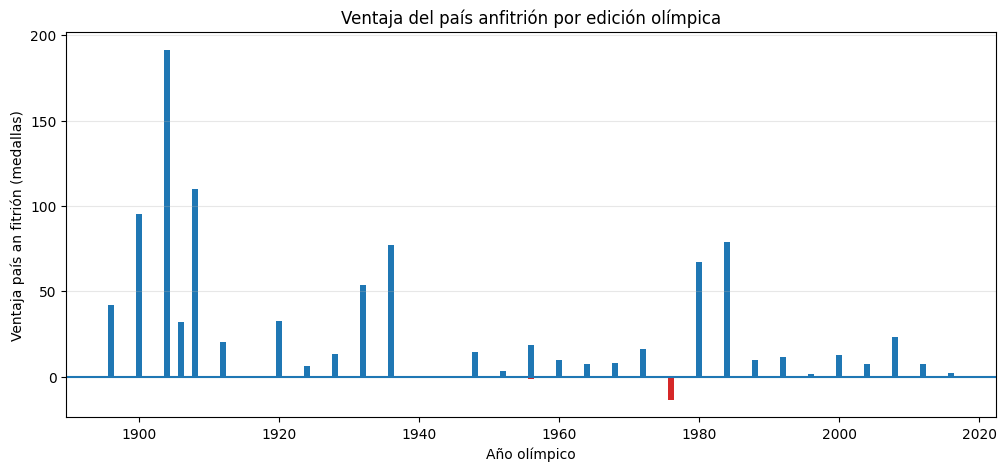

In [153]:
#Graficamos la diferencia de medallas de cada país amfitrión entre la edición de organización y la siguiente/anterior
colors = ['tab:blue' if x > 0 else 'tab:red' for x in host_medals['Home_advantage']]

plt.figure(figsize=(12, 5))
plt.bar(host_medals['Year'], host_medals['Home_advantage'], color=colors)
plt.axhline(0, linewidth=1.5)
plt.xlabel('Año olímpico')
plt.ylabel('Ventaja país an fitrión (medallas)')
plt.title('Ventaja del país anfitrión por edición olímpica')
plt.grid(axis='y', alpha=0.3)
plt.savefig("img/ventaja.png");
plt.show()



## Análisis China individual

In [155]:
# Repetimos pero solo seleccionando China
year_china = year_country.loc[:, ["China"]]

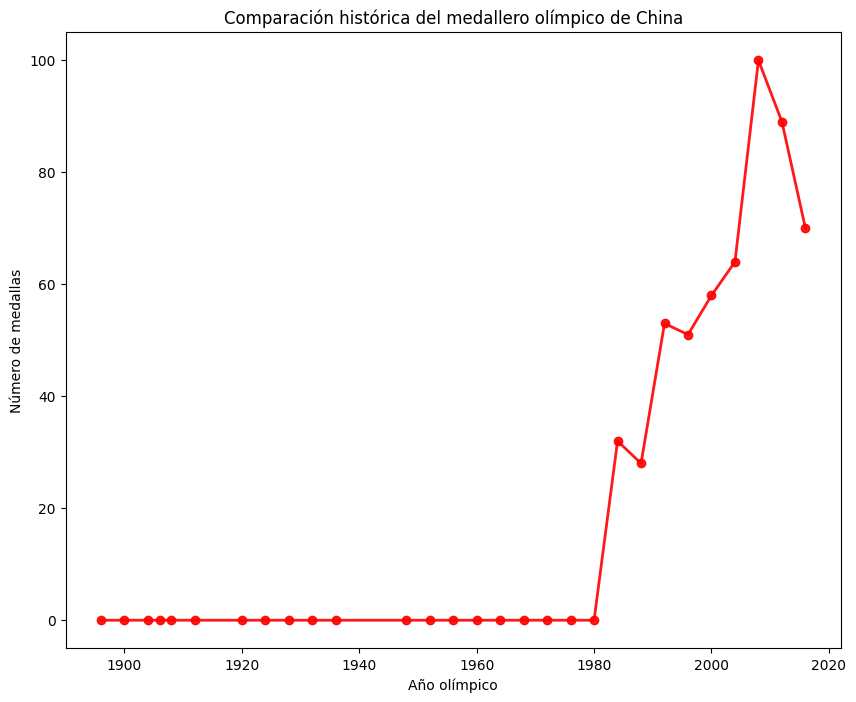

In [159]:
year_china.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2, color = "r", legend = False)
plt.xlabel('Año olímpico')
plt.ylabel('Número de medallas')
plt.title('Comparación histórica del medallero olímpico de China')

plt.savefig("img/Sergi/china.png");

La temprana participación de China en los Juegos Olímpicos se caracterizó por recursos limitados, desafíos políticos y resultados competitivos pobres, pero desempeñó un papel importante en el intercambio internacional y en el desarrollo del deporte chino. Igualmente, su participación no fue regular debido incialmente a la guerra civil china (hasta 1949). Tras la fundación de la República Popular China en 1949, el nuevo gobierno adoptó una postura positiva hacia el Movimiento Olímpico. Sin embargo, las disputas sobre la representación de China llevaron a su exclusión de varios Juegos Olímpicos entre 1956 y 1979.

A partir de Los Angeles 1984 se observa un salto inmediato en el número de medallas, debido a unas políticas estatales de inversión masiva en deporte de alto rendimiento y un sistema centralizado de detección y entrenamiento de talentos.

Entre los años 90 y 2008, la curva muestra un crecimiento constante y acelerado, debibo a la profesionalización del deporte, un enfoque estratégico en disciplinas con muchas medallas y una preparación intensiva para los juegos de Pequín 2008, que culminó con el mayor nombre de oros de la edición.

Desde entonces, se observa una ligera caída, aunque manteniéndose en niveles históricamente altos.